In [1]:
import os
import sys
src_path = os.path.join(os.curdir, "..")
sys.path.append(os.path.normpath(src_path))

In [2]:
import torch
import numpy as np
import pytorch_lightning as pl
from PIL import Image
from matplotlib import pyplot as plt
from torch.nn import functional as F
from torchvision.transforms import Compose, Resize, Normalize, ToTensor
from src.models.segmentation import SegmentationUnet
from src.data.segmentation_loader import SegmentationLoader
from src.models.utils import DiceBCELoss, DiceCoefficient

In [3]:
transforms = Compose([
    Resize(size=(512, 512)),
    ToTensor()
])
image_transforms = Compose([
    Resize(size=(512, 512)),
    ToTensor(),
    Normalize((0.4828,), (0.2488,))
])

In [4]:
images_dir = os.path.join(src_path, "data", "processed", "test", "images")
masks_dir = os.path.join(src_path, "data", "processed", "test", "masks")

In [5]:
sample_name = "0_test_1_.png"

In [6]:
image_path = os.path.join(images_dir, sample_name)
mask_path = os.path.join(masks_dir, sample_name)

In [7]:
image = image_transforms(Image.open(image_path)).unsqueeze(0)
mask = transforms(Image.open(mask_path)).unsqueeze(0)

In [8]:
image.shape, mask.shape

(torch.Size([1, 1, 512, 512]), torch.Size([1, 1, 512, 512]))

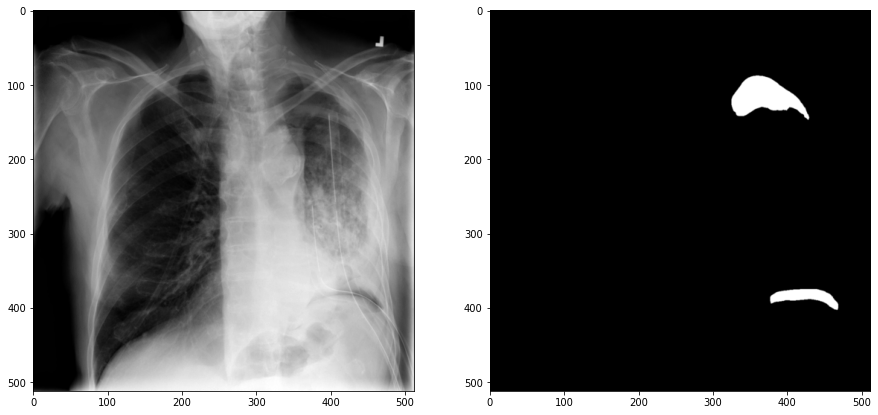

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 12))

ax1.imshow(image[0, 0, :, :], cmap="gray")
ax2.imshow(mask[0, 0, :, :], cmap="gray")
fig.show()

In [10]:
unet = SegmentationUnet()

In [11]:
output = torch.sigmoid(unet(image))

In [12]:
output.shape, mask.shape

(torch.Size([1, 1, 512, 512]), torch.Size([1, 1, 512, 512]))

In [13]:
criterion = torch.nn.BCELoss()

In [14]:
criterion(output, mask)

tensor(0.9512, grad_fn=<BinaryCrossEntropyBackward>)

In [15]:
mask.unique()

tensor([0.0000, 0.0157, 0.0627, 0.0941, 0.1098, 0.1255, 0.1569, 0.1725, 0.2196,
        0.2510, 0.2980, 0.3137, 0.3451, 0.3608, 0.4078, 0.4549, 0.5020, 0.5176,
        0.5490, 0.6275, 0.6431, 0.6588, 0.6902, 0.7059, 0.7804, 0.8275, 0.8431,
        0.8745, 0.8902, 0.9059, 0.9373, 0.9686, 0.9843, 1.0000])

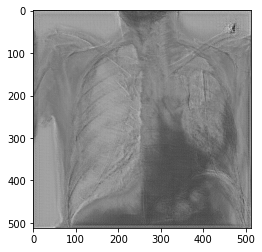

In [26]:
plt.imshow(output[0, 0].detach(), cmap="gray")

In [16]:
dicebce = DiceBCELoss()

In [17]:
dice_coeff = DiceCoefficient()

In [18]:
new_mask = torch.where(mask > 0, 1, 0).float()

In [19]:
dice_coeff(new_mask, new_mask)

tensor(1.)

In [20]:
dicebce(new_mask, new_mask)

tensor(0.)

In [21]:
dicebce(output, new_mask)

tensor(1.9125, grad_fn=<AddBackward0>)

In [22]:
dice_coeff(output, mask)

tensor(0.0346, grad_fn=<DivBackward0>)